# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from datetime import datetime
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
locations = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if (city not in cities):
        cities.append(city)
        countries.append(country)

#print(cities)
#print(countries)
city_count = len(cities)
print(city_count)

602


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "q": "",
    "units": "imperial",
    "appid": weather_api_key
}
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

cloudy = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind_speed = []
valid_cities = []
valid_countries = []
humid_per = []
cloud_per = []
current_date = []
log_file = open("../output_data/citylog.txt","w") 
for i in range(0,city_count):
    params["q"] = str(cities[i]) + "," + str(countries[i])
    response = requests.get(url, params)
    #print(response.url)
    data = response.json()
    #print(data)
    if(data['cod']!= "404"):
        log_text = f"Processing City " +str(i)+" with id "+str(data['id'])+" | "+str(cities[i])
        print(log_text)
        #city_writer.writerow(log_text)
        log_file.writelines(log_text)
        log_file.write("\n")
        valid_cities.append(data['name'])
        valid_countries.append(data['sys']['country'])
        cloudy.append(data['clouds']['all'])
        date.append(data['dt'])
        humid.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        wind_speed.append(data['wind']['speed'])
        ts = int(data['dt'])
        current_date = datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y')        
    else:
        print(f"City not found")

log_file.close()
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")
print(f"Current Date:"+str(current_date))

col_names = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat','Lng', 'Max Temp', 'Wind Speed']
data = list(zip(valid_cities, cloudy, valid_countries, date, humid, lat, lng, max_temp, wind_speed))
#print(data)

Beginning Data Retrieval
-------------------------------
Processing City 0 with id 1512205 | abaza
Processing City 1 with id 1268865 | jodhpur
Processing City 2 with id 3899695 | ancud
Processing City 3 with id 2077963 | albany
City not found
Processing City 5 with id 2015306 | tiksi
Processing City 6 with id 2630299 | hofn
Processing City 7 with id 1507390 | dikson
Processing City 8 with id 3369157 | cape town
Processing City 9 with id 2144528 | warrnambool
Processing City 10 with id 2163355 | hobart
Processing City 11 with id 6167817 | torbay
Processing City 12 with id 5972762 | hay river
Processing City 13 with id 2028164 | deputatskiy
City not found
Processing City 15 with id 6185377 | yellowknife
Processing City 16 with id 5379533 | orange cove
Processing City 17 with id 3833367 | ushuaia
Processing City 18 with id 3698705 | cascas
City not found
Processing City 20 with id 3728097 | les cayes
City not found
Processing City 22 with id 4020109 | atuona
Processing City 23 with id 584

City not found
Processing City 192 with id 6185021 | wynyard
Processing City 193 with id 3651949 | san cristobal
Processing City 194 with id 3894426 | coihaique
Processing City 195 with id 6137462 | saint-augustin
Processing City 196 with id 3408424 | ipixuna
Processing City 197 with id 2112309 | katsuura
Processing City 198 with id 3770066 | san luis
Processing City 199 with id 2013727 | vanavara
Processing City 200 with id 3506630 | el penon
Processing City 201 with id 286621 | salalah
Processing City 202 with id 2013639 | verkhnevilyuysk
Processing City 203 with id 1106677 | bambous virieux
Processing City 204 with id 3652764 | puerto ayora
Processing City 205 with id 3380290 | sinnamary
Processing City 206 with id 658288 | heinola
Processing City 207 with id 1515029 | ulaangom
Processing City 208 with id 2158767 | mareeba
Processing City 209 with id 1489828 | teeli
Processing City 210 with id 1528998 | yumen
Processing City 211 with id 3066095 | sitborice
Processing City 212 with i

Processing City 377 with id 3374083 | bathsheba
Processing City 378 with id 2206874 | waipawa
Processing City 379 with id 3372988 | horta
Processing City 380 with id 505820 | povenets
Processing City 381 with id 244878 | biltine
Processing City 382 with id 2278158 | buchanan
Processing City 383 with id 3385899 | tutoia
Processing City 384 with id 1649150 | bengkulu
Processing City 385 with id 1850523 | tateyama
Processing City 386 with id 2446796 | bilma
Processing City 387 with id 5779548 | payson
Processing City 388 with id 3393536 | olinda
Processing City 389 with id 100926 | umm lajj
Processing City 390 with id 4031637 | lavrentiya
Processing City 391 with id 7671223 | kloulklubed
City not found
Processing City 393 with id 2274895 | monrovia
City not found
Processing City 395 with id 3374346 | ponta do sol
City not found
Processing City 397 with id 566157 | divnomorskoye
Processing City 398 with id 3448903 | sao joao da barra
City not found
Processing City 400 with id 6111862 | por

Processing City 567 with id 5927969 | corner brook
Processing City 568 with id 905846 | mpika
Processing City 569 with id 1816751 | beidao
Processing City 570 with id 3573197 | hamilton
Processing City 571 with id 5970873 | hare bay
Processing City 572 with id 4344819 | waggaman
Processing City 573 with id 917748 | choma
City not found
Processing City 575 with id 3461408 | ilheus
Processing City 576 with id 6145563 | shawville
Processing City 577 with id 370481 | marawi
Processing City 578 with id 2524928 | corleone
Processing City 579 with id 3839307 | rawson
Processing City 580 with id 3571913 | marsh harbour
Processing City 581 with id 2090021 | namatanai
Processing City 582 with id 1310120 | mawlaik
Processing City 583 with id 3500957 | la romana
Processing City 584 with id 2090495 | morehead
Processing City 585 with id 161616 | balkanabat
Processing City 586 with id 1735799 | sri aman
Processing City 587 with id 1327659 | chauk
Processing City 588 with id 625721 | lyuban
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Output File (CSV)
city_weather_file = "../output_data/cities.csv"
with open('../output_data/cities.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(col_names)
    writer.writerows(data)

In [5]:
# Create a Data Frame
weather_df = pd.read_csv(city_weather_file)
#print(weather_df)
display(weather_df)
print(weather_df.count())

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0         Abaza         100      RU  1584468904        87  52.66   90.09   
1       Jodhpur          17      IN  1584468904        22  26.29   73.03   
2         Ancud          40      CL  1584468904        67 -41.87  -73.82   
3        Albany          17      AU  1584468904        81 -35.02  117.89   
4         Tiksi          84      RU  1584468905        88  71.69  128.87   
..          ...         ...     ...         ...       ...    ...     ...   
528      Kozhva          82      RU  1584468987        89  65.11   57.05   
529  Kazanskoye          50      RU  1584468987        82  55.64   69.23   
530   Caravelas           9      BR  1584468689        73 -17.71  -39.25   
531      Eureka          90      US  1584468863        70  40.80 -124.16   
532       Khovd          17      MN  1584468987        47  48.01   91.64   

     Max Temp  Wind Speed  
0       29.39        4.41  
1       75.65       10.49  
2       60.80        6.93  
3       53.60       10.29  
4      -30.73        8.37  
..        ...         ...  
528     21.65       10.71  
529     26.33       17.94  
530     81.77        8.84  
531     46.40        6.93  
532     28.13        2.30  

[533 rows x 9 columns]

City          533
Cloudiness    533
Country       531
Date          533
Humidity      533
Lat           533
Lng           533
Max Temp      533
Wind Speed    533
dtype: int64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

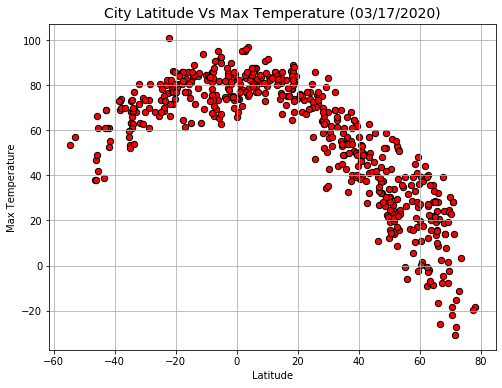

In [6]:
lat = weather_df['Lat']
max_temp = weather_df['Max Temp']
plt.figure(figsize=(8, 6))
plt.scatter(lat,max_temp, marker="o", c="red", edgecolors= "black", s=40)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude Vs Max Temperature "+"("+str(current_date)+")", fontsize=14)
plt.grid(True)
plt.savefig("../output_data/Lat_Temp_Plot.png")
plt.show()

There appears to be a linear decrease in temperature with the increase in latitude as we move north from the equator.
However, for the cities in southern hemisphere we do not see much of a decrease in temperature moving south of the equator to around -40F.

#### Latitude vs. Humidity Plot

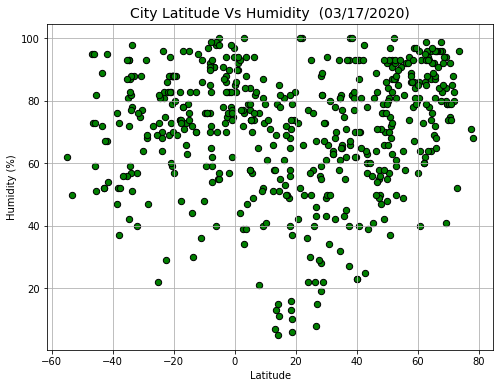

In [7]:
humid_per = weather_df['Humidity']
plt.figure(figsize=(8, 6))
plt.scatter(lat,humid_per, marker="o", c="green", edgecolors= "black", s=40)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs Humidity  "+"("+str(current_date)+")", fontsize=14)
plt.grid(True)
plt.savefig("../output_data/Lat_Humid_Plot.png")
plt.show()

There does not seem to be a strong correlation between latitude and humidity.However, it appears that of all the cities considered, more cities have a humidity above 60%.

#### Latitude vs. Cloudiness Plot

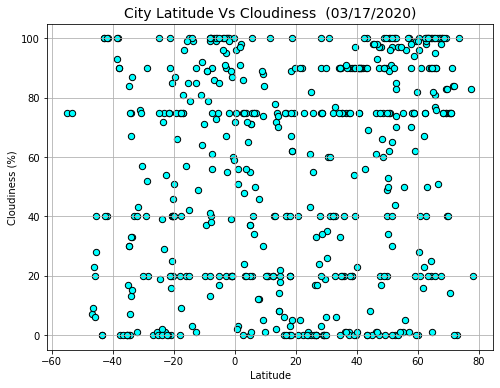

In [8]:
cloud_per = weather_df['Cloudiness']
plt.figure(figsize=(8, 6))
plt.scatter(lat,cloud_per, marker="o", c="cyan", edgecolors= "black", s=40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs Cloudiness  "+"("+str(current_date)+")", fontsize=14)
plt.grid(True)
plt.savefig("../output_data/Lat_Cloud_Plot.png")
plt.show()

For the cities considered, latitude and cloudiness do not seem to be correlated much. We do notice a collection of close data points at various cloudiness % levels (0%,20%,40%,70% and 100%) regardless of latitude.

#### Latitude vs. Wind Speed Plot

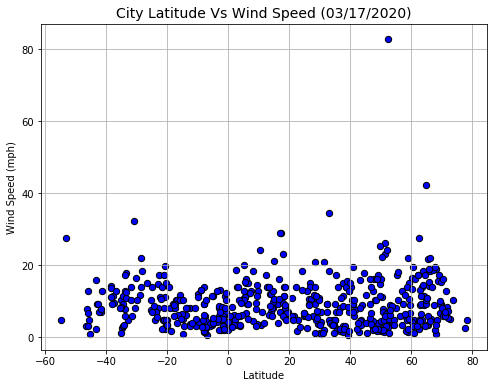

In [9]:
wind_speed = weather_df['Wind Speed']
plt.figure(figsize=(8, 6))
plt.scatter(lat,wind_speed, marker="o", c="blue", edgecolors= "black", s=40)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude Vs Wind Speed "+"("+str(current_date)+")", fontsize=14)
plt.grid(True)
plt.savefig("../output_data/Lat_Wind_Plot.png")
plt.show()

Similarly, there seems to be no correlation between Wind Speed and Latitude for the cities considered. One thing to note is that for a majority of the cities in both the hemispheres, the wind speed seems to fall in the range of 0-10 mph. 

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
# Calculate the correlation coefficient and linear regression model 
def linear_regress_plot(col1,col2,x_loc,y_loc):
    correlation = st.pearsonr(col1,col2)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(col1, col2)
    regress_values = col1 * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8, 6))
    plt.scatter(col1,col2,s=40, c='blue',edgecolors='black')
    plt.plot(col1,regress_values,"r-",color='red')
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="black")

In [11]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = weather_df[weather_df['Lat'] >= 0]
#print(north_hemi_df)
display(north_hemi_df)
south_hemi_df = weather_df[weather_df['Lat'] < 0]
#print(south_hemi_df)
display(south_hemi_df)

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0         Abaza         100      RU  1584468904        87  52.66   90.09   
1       Jodhpur          17      IN  1584468904        22  26.29   73.03   
4         Tiksi          84      RU  1584468905        88  71.69  128.87   
5          Hofn          20      IS  1584468905        64  64.25  -15.21   
6        Dikson         100      RU  1584468905        96  73.51   80.55   
..          ...         ...     ...         ...       ...    ...     ...   
527        Mēga          72      ET  1584468987        47   4.05   38.30   
528      Kozhva          82      RU  1584468987        89  65.11   57.05   
529  Kazanskoye          50      RU  1584468987        82  55.64   69.23   
531      Eureka          90      US  1584468863        70  40.80 -124.16   
532       Khovd          17      MN  1584468987        47  48.01   91.64   

     Max Temp  Wind Speed  
0       29.39        4.41  
1       75.65       10.49  
4      -30.73        8.37  
5       35.60       11.41  
6        3.47       10.36  
..        ...         ...  
527     76.01        9.57  
528     21.65       10.71  
529     26.33       17.94  
531     46.40        6.93  
532     28.13        2.30  

[358 rows x 9 columns]

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
2          Ancud          40      CL  1584468904        67 -41.87  -73.82   
3         Albany          17      AU  1584468904        81 -35.02  117.89   
7      Cape Town          13      ZA  1584468874        82 -33.93   18.42   
8    Warrnambool          93      AU  1584468905        47 -38.38  142.48   
9         Hobart         100      AU  1584468774        52 -42.88  147.33   
..           ...         ...     ...         ...       ...    ...     ...   
509       Ilhéus          20      BR  1584468984        74 -14.79  -39.05   
513       Rawson           0      AR  1584468984        72 -43.30  -65.10   
515    Namatanai          96      PG  1584468985        78  -3.67  152.43   
518     Morehead          79      PG  1584468985        97  -8.71  141.64   
530    Caravelas           9      BR  1584468689        73 -17.71  -39.25   

     Max Temp  Wind Speed  
2       60.80        6.93  
3       53.60       10.29  
7       68.00       12.75  
8       73.00       14.27  
9       69.01        9.17  
..        ...         ...  
509     86.00       10.29  
513     60.89       15.90  
515     81.77       12.73  
518     73.13        2.75  
530     81.77        8.84  

[175 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.9


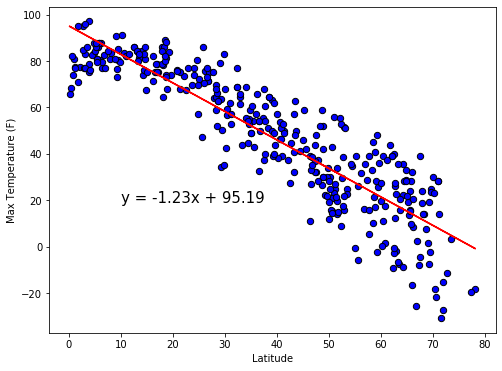

In [12]:
linear_regress_plot(north_hemi_df['Lat'],north_hemi_df['Max Temp'],10,19)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/North_Temp_Lat_Plot.png")
plt.show()

In the northern hemisphere, there seems to be a strong negative linear correlation between latitude and maximum temperature of a city. A r squared value of -0.9 suggests that cities with higher values of latitude are associated with lower values of maximum temperature. In other words,that as the latitude increases, the maximum temperature of a city seems to decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.66


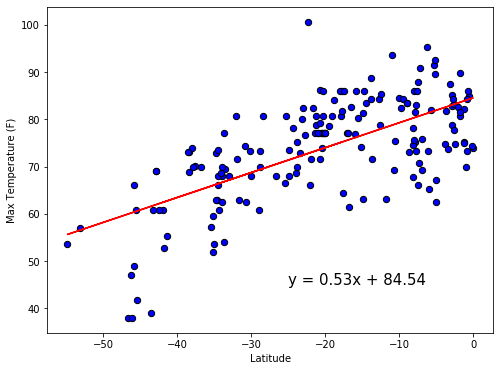

In [13]:
linear_regress_plot(south_hemi_df['Lat'],south_hemi_df['Max Temp'],-25,45)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/South_Temp_Lat_Plot.png")
plt.show()

In the southern hemisphere, there seems to be moderate positive relationship between latitude and max temperature of a city. A r squared value of 0.66 suggests that cities with higher values of latitude (closer to the equator) are associated with higher values of maximum temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.32


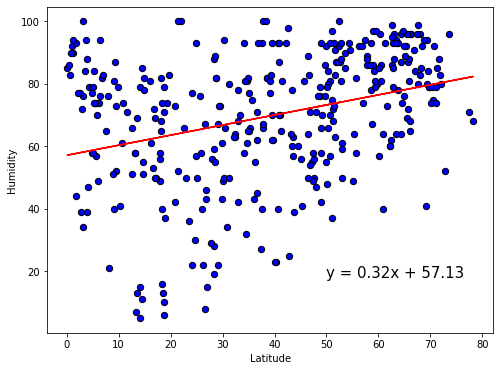

In [14]:
linear_regress_plot(north_hemi_df['Lat'],north_hemi_df['Humidity'],50,18)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/North_Humid_Lat_Plot.png")
plt.show()

This scatter plot shows a weaker relationship between temperature and humidity in the northern hemishphere, with an r-squared value of 0.3.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.21


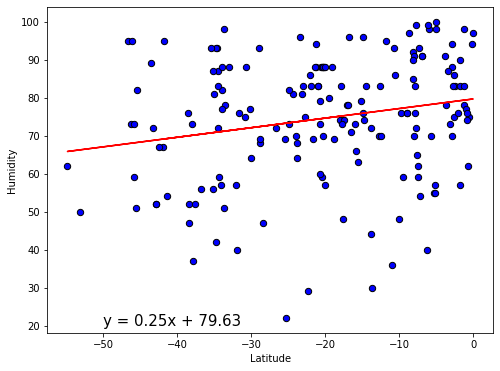

In [15]:
linear_regress_plot(south_hemi_df['Lat'],south_hemi_df['Humidity'],-50,20)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/South_Humid_Lat_Plot.png")
plt.show()

Similar to the nothern hemisphere, there seems be a weaker relationship between temperature and humidity in the southern hemishphere too, with an r-squared value of 0.2

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.28


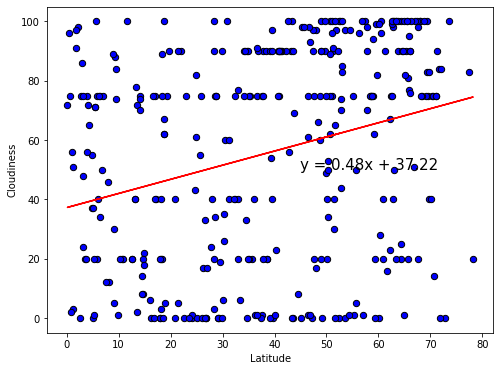

In [16]:
linear_regress_plot(north_hemi_df['Lat'],north_hemi_df['Cloudiness'],45,50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/North_Cloud_Lat_Plot.png")
plt.show()

There does not seem to be a significant correlation between latitude and cloudiness in the northern hemisphere. The r-squared value of 0.28 shows there is a positive correlation between the two, but it is weak.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.31


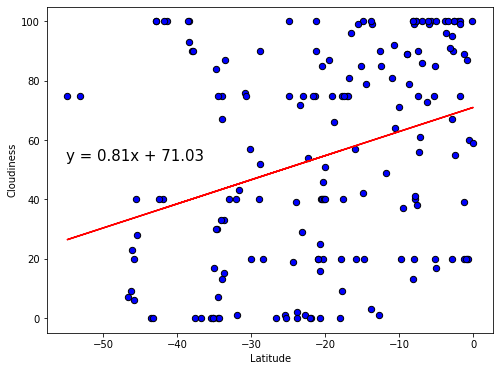

In [17]:
linear_regress_plot(south_hemi_df['Lat'],south_hemi_df['Cloudiness'],-55,53)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/South_Cloud_Lat_Plot.png")
plt.show()

The scatter plot shows that there exists a weak positive correlation between latitude and cloudiness in the southern hemisphere as well(with an r-squared value of 0.3). 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.04


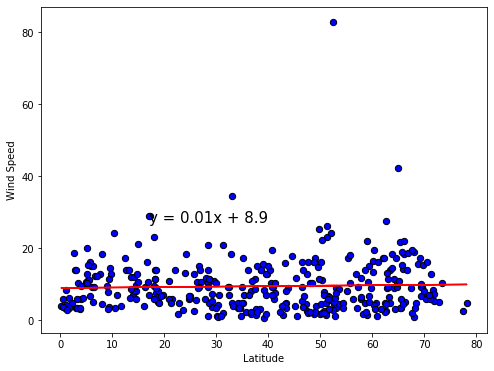

In [18]:
linear_regress_plot(north_hemi_df['Lat'],north_hemi_df['Wind Speed'],17,27)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/North_Wind_Lat_Plot.png")
plt.show()

There seems to be almost no correlation between latitude and wind speed with an r-squared value of 0.04, in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.3


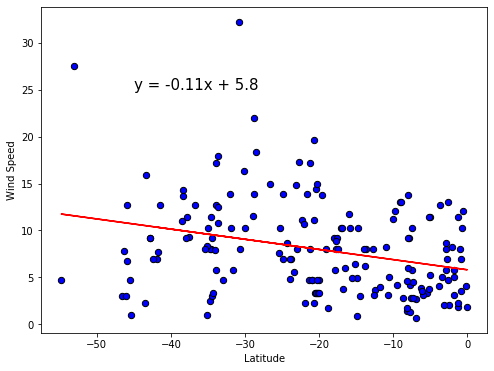

In [19]:
linear_regress_plot(south_hemi_df['Lat'],south_hemi_df['Wind Speed'],-45,25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/South_Wind_Lat_Plot.png")
plt.show()

However, in the southern hemishphere, a moderate to weak negative relationship seems to exist between the wind speed and latitude.Wind speed seems to increase as we move away from the equator.